In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
dataframe = pd.read_csv('avocado.csv')
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
dataframe.describe()b

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [14]:
dataframe.count()

Unnamed: 0      18249
Date            18249
AveragePrice    18249
Total Volume    18249
4046            18249
4225            18249
4770            18249
Total Bags      18249
Small Bags      18249
Large Bags      18249
XLarge Bags     18249
type            18249
year            18249
region          18249
dtype: int64

Tenemos 18249 regiones y para saber cuantas entradas hay por región hacemos lo siguiente:

In [82]:
print(dataframe.groupby('year').size())

year
2015    5615
2016    5616
2017    5722
2018    1296
dtype: int64


Podemos observar como cambia la distribución de aguacates por año.

Veremos graficamente nuestros datos para tener una idea de la dispersión de los mismos:

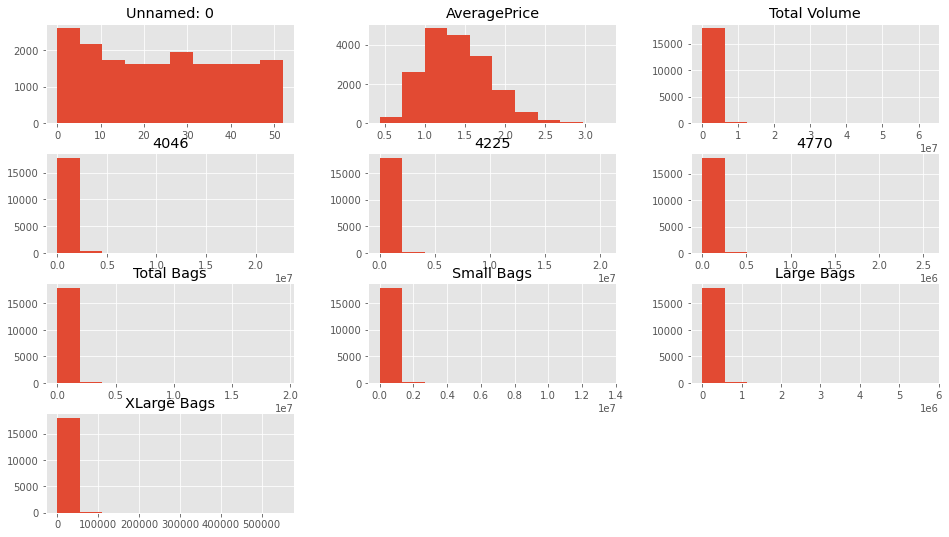

In [83]:
dataframe.drop(['year'],1).hist()
plt.show()

En este caso seleccionamos 3 dimensiones: tamaños de las bolsas y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus años de distribución.

C:\Users\Admin\anaconda3\envs\El arte de la analtica\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


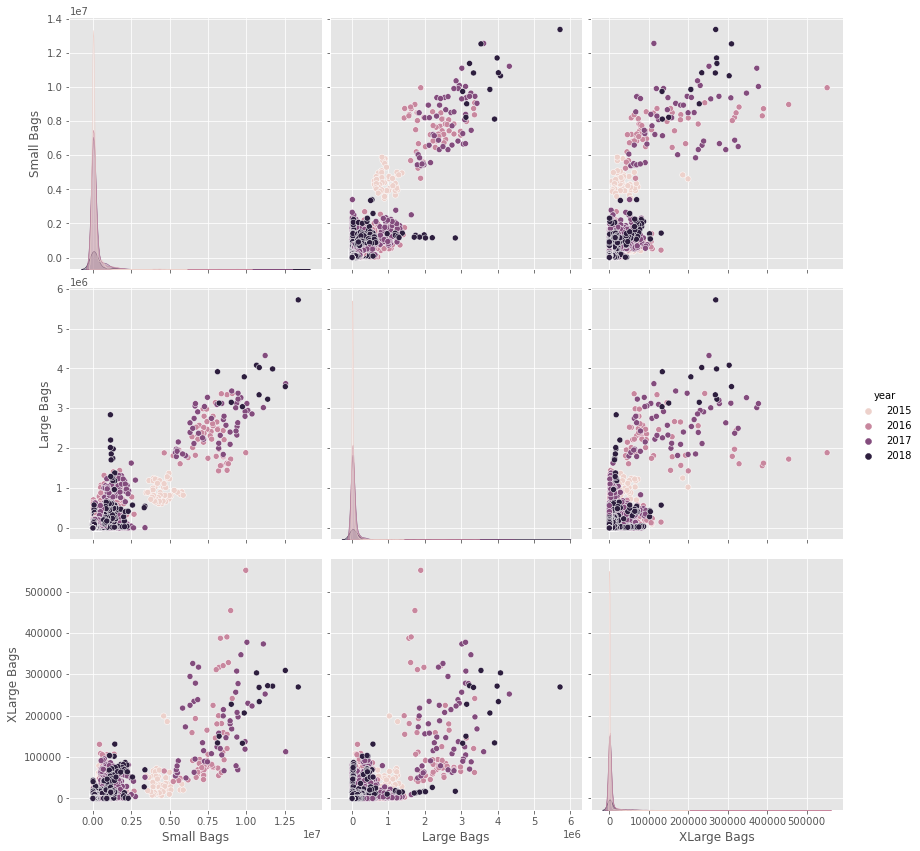

In [84]:
sb.pairplot(dataframe.dropna(), hue='year',size=4,vars=["Small Bags","Large Bags","XLarge Bags"],kind='scatter')

Revisando la gráfica no pareciera que haya algún tipo de agrupación o correlación entre la región y sus categorías.

Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, sólo cargamos las columnas op, ex y ag en nuestra variable X.

In [89]:
X = np.array(dataframe[["Small Bags","Large Bags","XLarge Bags"]])
y = np.array(dataframe['year'])
#y = dataframe['year'].unique()
print(y)
X.shape

[2015 2015 2015 ... 2018 2018 2018]


(18249, 3)

Ahora veremos una gráfica en 3D con 9 colores representando las categorías

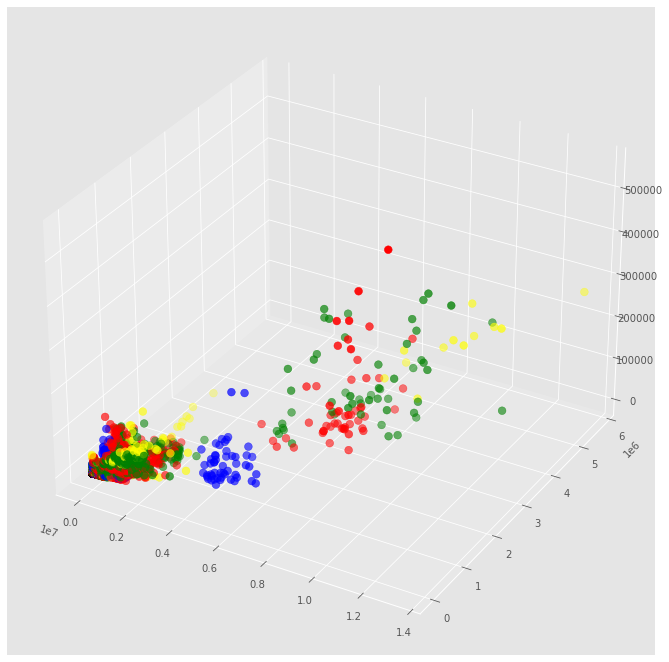

In [90]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','yellow']
asignar=[]
for row in y:
    asignar.append(colores[row-2015])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

Veremos si con K-means, podemos “pintar” esta misma gráfica de otra manera, con clusters diferenciados.

Obtener el valor K
Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que comentábamos antes. Este es nuestro resultado:

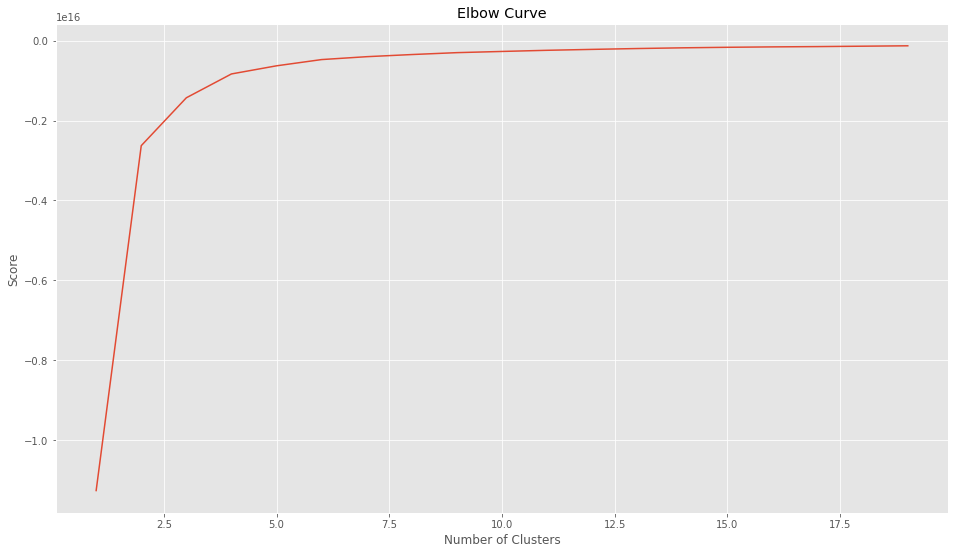

In [91]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Realmente la curva es bastante “suave”. Considero a 4 como un buen número para K. Según vuestro criterio podría ser otro.

Ejecutamos K-Means
Ejecutamos el algoritmo para 4 clusters y obtenemos las etiquetas y los centroids.

In [92]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[5.50221165e+04 1.81848983e+04 7.49352866e+02]
 [8.50925554e+06 2.68719018e+06 1.77956828e+05]
 [1.01550280e+06 2.82307780e+05 1.89879651e+04]
 [4.67400782e+06 1.10514192e+06 5.04226978e+04]]


Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

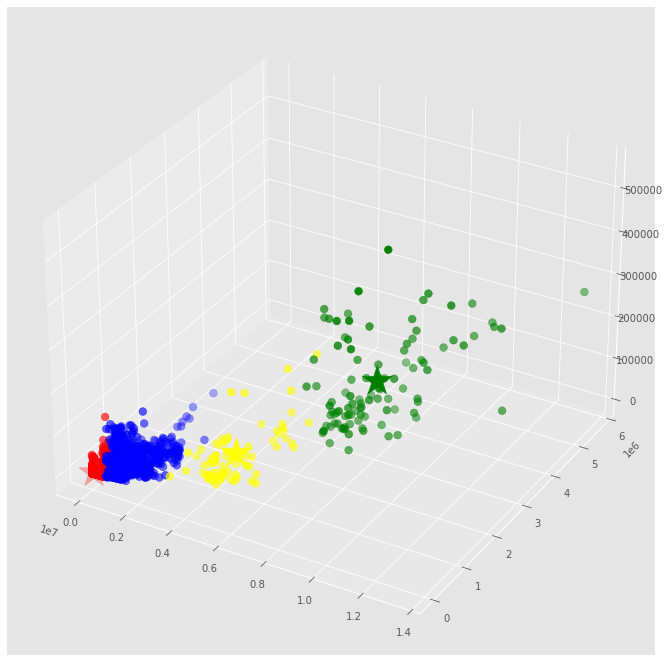

In [94]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Aqui podemos ver que el Algoritmo de K-Means con K=3 ha agrupado a 4 años de sistribución, teniendo en cuenta las 3 dimensiones que utilizamos:"Small Bags","Large Bags","XLarge Bags" (tipo de bolsa).

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

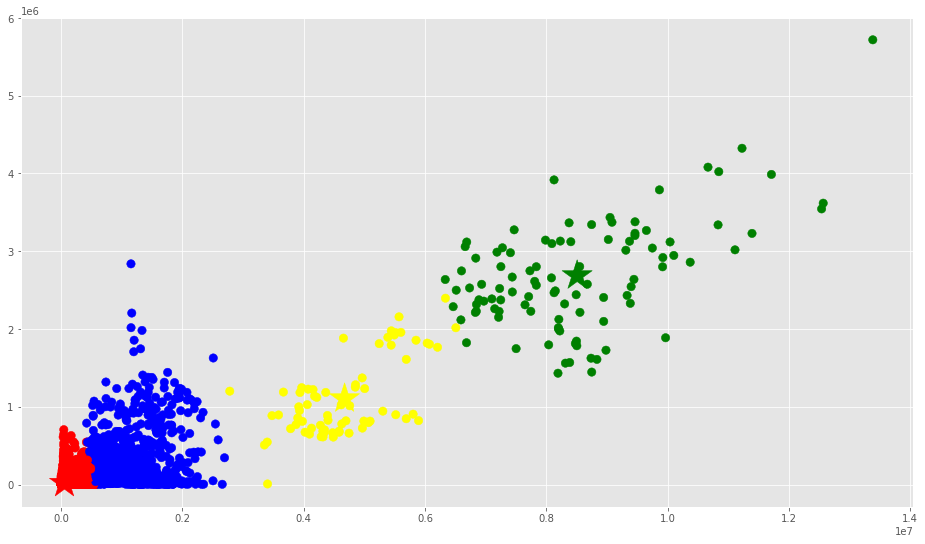

In [96]:
# Getting the values and plotting it
f1 = dataframe['Small Bags'].values
f2 = dataframe['Large Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

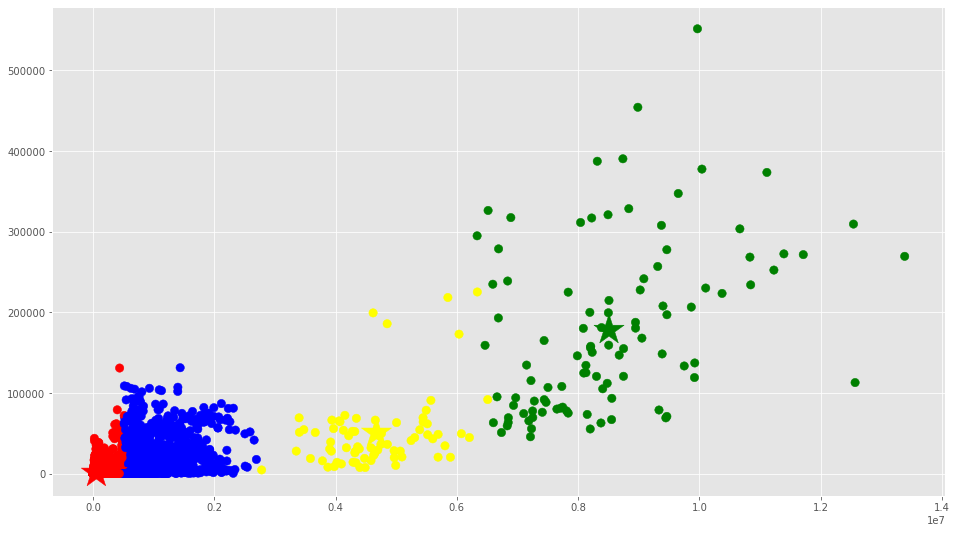

In [97]:
# Getting the values and plotting it
f1 = dataframe['Small Bags'].values
f2 = dataframe['XLarge Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

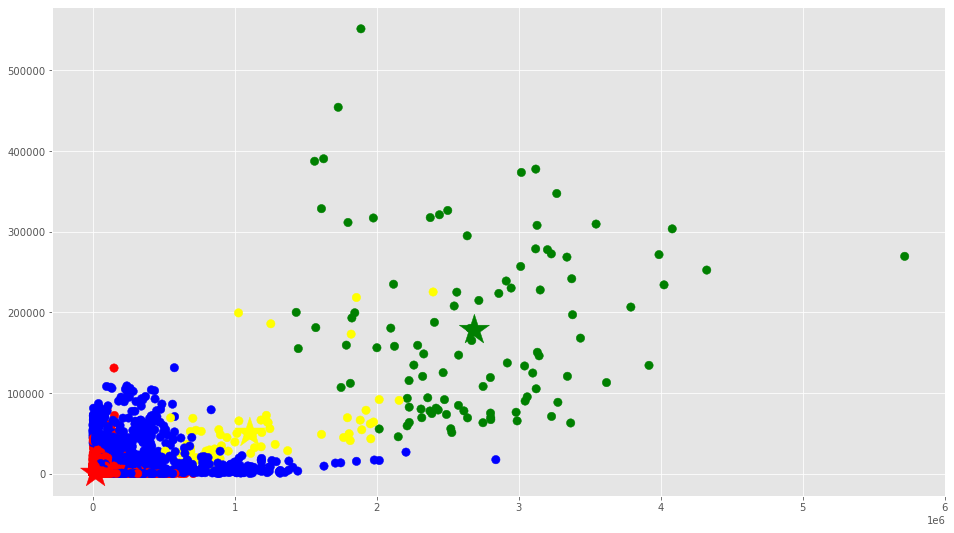

In [98]:
f1 = dataframe['Large Bags'].values
f2 = dataframe['XLarge Bags'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

En estas gráficas vemos que están bastante bien diferenciados los grupos.

Que tipo de aguacate se produjo más en cada año

In [99]:
copy =  pd.DataFrame()
copy['type']=dataframe['type'].values
copy['year']=dataframe['year'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,16892
1,green,101
2,blue,1184
3,yellow,72


Y podemos ver la diversidad en rubros laborales de cada uno. Por ejemplo en el grupo 0 (rojo), vemos que hay de todas las actividades laborales aunque predominan de actividad 1 y 2 correspondiente a Actores y Cantantes con 11 y 15 famosos.

In [101]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['year']=[0,1,2,3,4,5,6,7,8,9,10,11,12]
diversidadGrupo['Total Bags']=group_referrals.groupby('year').size()
diversidadGrupo

,year,Total Bags
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


Buscaremos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

In [102]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([2642, 8351, 8049, 2686], dtype=int64)

In [104]:
users=dataframe['year'].values
for row in closest:
    print(users[row])

2015
2017
2017
2015
